In [3]:
# @title Get Cabin Co-Ordinates - V1
print("Get Cabin Co-Ordinates")

Get Cabin Co-Ordinates


In [ ]:
# @title Install the required packages
!pip install pytesseract

In [21]:
# @title Import necessary libraries
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Configure tesseract executable path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract

SyntaxError: unterminated string literal (detected at line 7) (<ipython-input-21-143c912c53ac>, line 7)

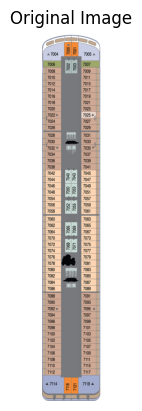

In [15]:
# @title Load and Display Original Image
# Path to your image file
image_path = './Ships/Azamara-3711.png'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()


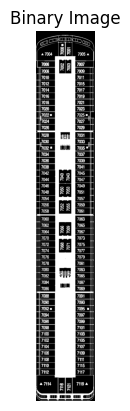

In [16]:
 # @title Preprocess the Image
 # Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding or other preprocessing techniques
_, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY_INV)

# Display the preprocessed image
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()


In [17]:
 # @title Extract Text Using Tesseract
 # Use pytesseract to do OCR on the image
custom_config = r'--oem 3 --psm 6 outputbase digits'
text = pytesseract.image_to_string(binary_image, config=custom_config)

# Print the extracted text
print("Extracted Text:", text)


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [18]:
# @title  Get the Coordinates of Detected Numbers
# Get the coordinates of the detected numbers
boxes = pytesseract.image_to_boxes(binary_image, config=custom_config)

# Initialize a list to store detected four-digit numbers and their coordinates
four_digit_numbers = []

# Iterate over the boxes to extract coordinates and digits
for b in boxes.splitlines():
    b = b.split()
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    digit = b[0]
    # Store the bounding box and digit
    four_digit_numbers.append((digit, x, y, w, h))


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [19]:
# @title Group Digits into Four-Digit Numbers and Calculate Coordinates
# Group digits into four-digit numbers
i = 0
while i <= len(four_digit_numbers) - 4:
    group = four_digit_numbers[i:i+4]
    # Check if we have a valid four-digit number
    if all(len(d[0]) == 1 and d[0].isdigit() for d in group):
        x1, y1 = group[0][1], group[0][2]
        x2, y2 = group[3][3], group[3][4]
        four_digit_number = ''.join(d[0] for d in group)
        # Draw the rectangle
        cv2.rectangle(image, (x1, image.shape[0] - y1), (x2, image.shape[0] - y2), (0, 255, 0), 2)
        # Calculate the center coordinates
        center_x = (x1 + x2) // 2
        center_y = image.shape[0] - (y1 + y2) // 2
        # Draw the center coordinates on the image
        coordinates_text = f"({center_x}, {center_y})"
        cv2.putText(image, coordinates_text, (x1, image.shape[0] - y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
        print(f"Four-digit number '{four_digit_number}' found at coordinates (x1, y1, x2, y2): {x1}, {y1}, {x2}, {y2}")
        print(f"Center coordinates: {center_x}, {center_y}")
        i += 4  # Move to the next potential group
    else:
        i += 1  # Move to the next digit


NameError: name 'four_digit_numbers' is not defined

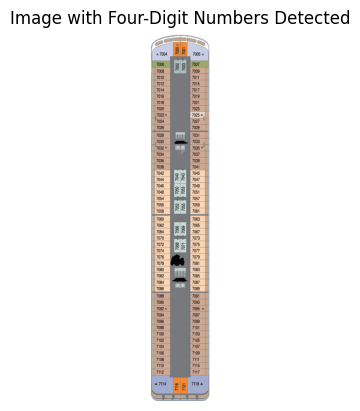

True

In [20]:
# @title Display the Image with Detected Numbers
# Display the image with rectangles and coordinates
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image with Four-Digit Numbers Detected')
plt.axis('off')
plt.show()

# Save the output image
output_image_path = './Ships/Output/Azamara-3711-output.png'
cv2.imwrite(output_image_path, image)
